In [1]:
#import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize'] = (20,10)

In [3]:
pd.set_option('display.max_rows',300)
pd.set_option('display.max_columns',1400)

In [5]:
#load dataset

df1 = pd.read_csv('https://raw.githubusercontent.com/arunimas1506/Bengaluru-House-Price-Prediction/master/bengaluru_house_prices.csv')

In [6]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
df1.shape

(13320, 9)

In [9]:
#check percentage of NaN data in every column
round((100*df1.isnull().sum())/len(df1.index),2)

area_type        0.00
availability     0.00
location         0.01
size             0.12
society         41.31
total_sqft       0.00
bath             0.55
balcony          4.57
price            0.00
dtype: float64

In [10]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

Text(0.5, 1.0, 'Area Type & Price')

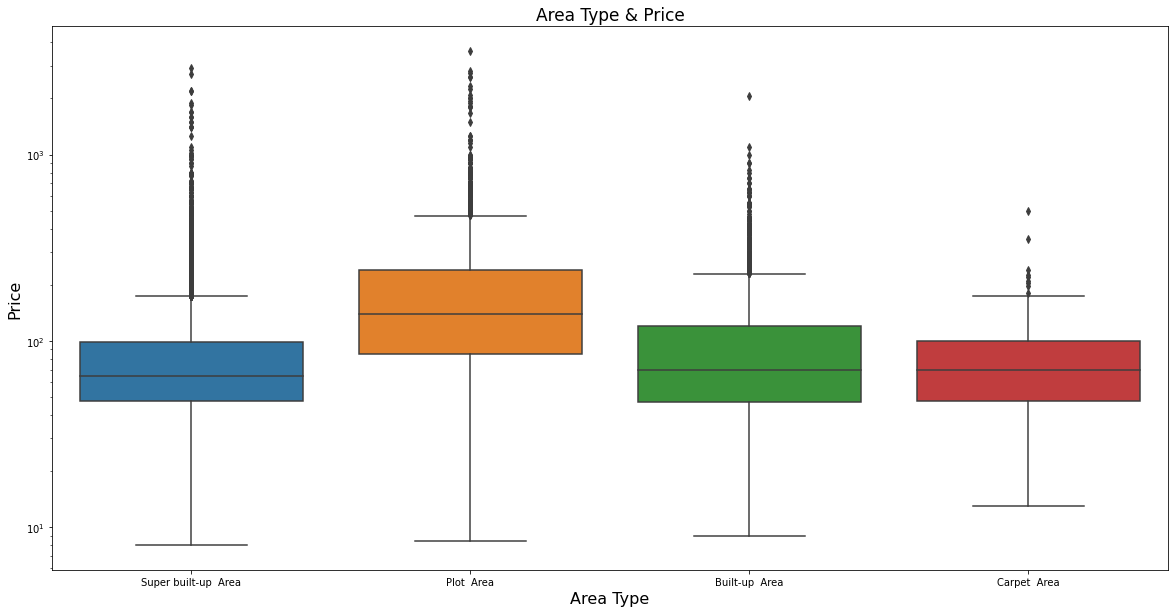

In [11]:
#plot to show different Area Type and Price comparision

plt.yscale('log')
ax = sb.boxplot('area_type','price',data=df1)
ax.set_xlabel('Area Type',fontdict={'fontsize':16})
ax.set_ylabel('Price',fontdict={'fontsize':16})
ax.set_title('Area Type & Price',fontdict={'fontsize':17})

# We can see from the above plot that their is no relation between area type and price

Text(0.5, 1.0, 'Balcony & Price')

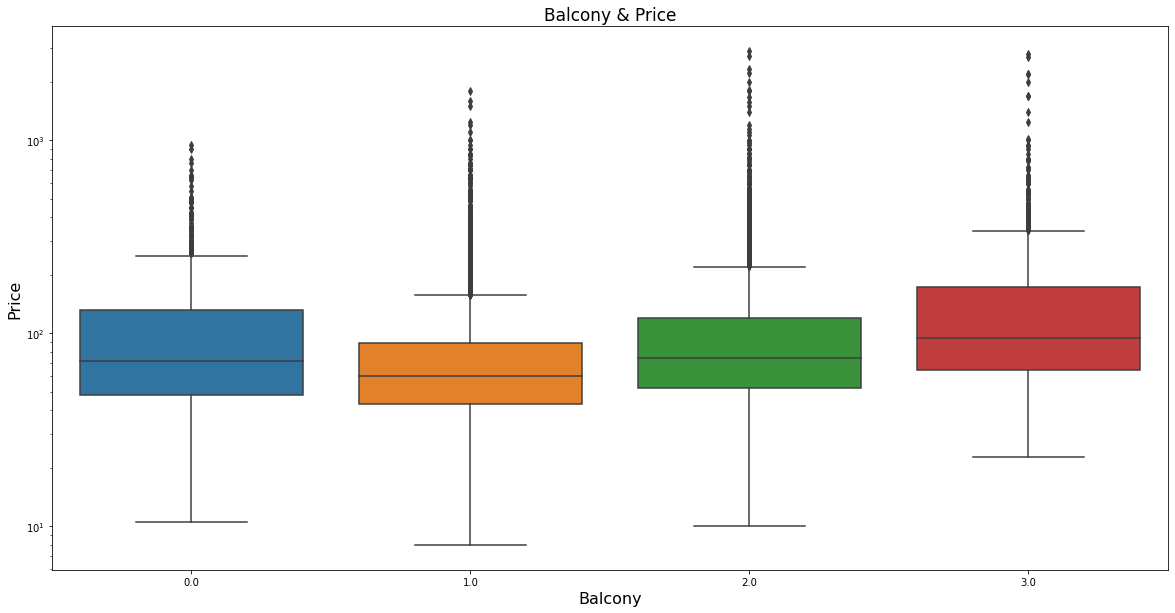

In [12]:
#plot to show different numbers of balcony and Price comparision

plt.yscale('log')
ax = sb.boxplot('balcony','price',data=df1)
ax.set_xlabel('Balcony',fontdict={'fontsize':16})
ax.set_ylabel('Price',fontdict={'fontsize':16})
ax.set_title('Balcony & Price',fontdict={'fontsize':17})

# We can clearly see from the above plot that there is no relation between Balcony and Price

In [13]:
df1['availability'].value_counts()

Ready To Move           10581
18-Dec                    307
18-May                    295
18-Apr                    271
18-Aug                    200
19-Dec                    185
18-Jul                    143
18-Mar                    131
18-Jun                     99
20-Dec                     98
21-Dec                     93
19-Mar                     88
18-Feb                     62
18-Nov                     47
18-Jan                     43
18-Sep                     41
19-Jun                     40
19-Jan                     39
18-Oct                     39
19-Jul                     36
17-Dec                     29
20-Jan                     24
19-Sep                     21
17-Oct                     21
22-Jun                     19
19-Aug                     18
21-Jun                     17
20-Aug                     16
Immediate Possession       16
19-Apr                     16
19-Oct                     15
21-Mar                     14
17-Jun                     13
21-Jan    

In [14]:
df1.groupby('availability')['price'].mean()

availability
14-Jul                   43.710000
14-Nov                   43.710000
15-Aug                   62.000000
15-Dec                  130.000000
15-Jun                   97.000000
15-Nov                  125.000000
15-Oct                  280.500000
16-Dec                  130.000000
16-Jan                  110.000000
16-Jul                  129.000000
16-Mar                  150.333333
16-Nov                   39.000000
16-Oct                   65.000000
16-Sep                  153.800000
17-Apr                   80.975714
17-Aug                   98.994444
17-Dec                  123.115517
17-Feb                  152.000000
17-Jan                  139.000000
17-Jul                  124.023333
17-Jun                   72.122308
17-Mar                  111.500000
17-May                  117.875000
17-Nov                  120.614167
17-Oct                   67.128095
17-Sep                  199.287273
18-Apr                  100.053395
18-Aug                   69.952425
18-Dec 

In [15]:
#drop insignificant features
df2=df1.drop(['area_type','availability','society','balcony'],axis=1)

In [16]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [17]:
#check NaN values
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [18]:
#check percentage 
round((100*df2.isnull().sum())/len(df2.index),2)

location      0.01
size          0.12
total_sqft    0.00
bath          0.55
price         0.00
dtype: float64

In [21]:
#delete NaN Data

df3=df2.dropna()

In [22]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [23]:
#check unique values of different types of bedrooms
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [24]:
#apply split function to clear the data from size column
df3['BHK'] = df3['size'].apply(lambda x:x.split(' ')[0])

In [25]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [26]:
df3.drop(['size'],axis=1,inplace=True)

In [27]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   total_sqft  13246 non-null  object 
 2   bath        13246 non-null  float64
 3   price       13246 non-null  float64
 4   BHK         13246 non-null  object 
dtypes: float64(2), object(3)
memory usage: 620.9+ KB


In [28]:
df3['BHK']=df3['BHK'].astype(int)

In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   total_sqft  13246 non-null  object 
 2   bath        13246 non-null  float64
 3   price       13246 non-null  float64
 4   BHK         13246 non-null  int32  
dtypes: float64(2), int32(1), object(2)
memory usage: 569.2+ KB


In [30]:
df3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [31]:
df3[df3['BHK']>=10]

,location,total_sqft,bath,price,BHK
459,1 Giri Nagar,5000,9.0,360.0,11
1718,2Electronic City Phase II,8000,27.0,230.0,27
1735,Kadarenahalli,750,10.0,90.0,10
1768,1 Ramamurthy Nagar,1200,11.0,170.0,11
1795,SBM Colony,1660,10.0,475.0,10
3096,Jp nagar 8th Phase .,12000,12.0,525.0,10
3379,1Hanuman Nagar,2000,16.0,490.0,19
3523,Jigani,1200,10.0,105.0,10
3609,Koramangala Industrial Layout,10000,16.0,550.0,16
3853,1 Annasandrapalya,1200,6.0,150.0,11


In [32]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [33]:
#custom function to convert string into float
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [34]:
#extract total_sqft data which are not converted into float - i.e. data with some mis-interpretations
df3[~df3['total_sqft'].apply(is_float)].head(20)

,location,total_sqft,bath,price,BHK
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [35]:
#custom function to clean the sqft mis-interpreted data
def convert_sqft_to_num(x):
    lst_token = x.split('-')
    if len(lst_token) == 2:
        return (float(lst_token[0])+float(lst_token[1]))/2
    try:
        return float(x)
    except:
        return None

In [36]:
#sanity check
convert_sqft_to_num('2100 - 2850')

2475.0

In [37]:
#apply function on the total_sqft 
df3['total_sqft']=df3['total_sqft'].apply(convert_sqft_to_num)

In [38]:
df3.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [39]:
#check NaN data
df3['total_sqft'].isnull().sum()

46

In [40]:
df3[df3['total_sqft'].isnull()]

,location,total_sqft,bath,price,BHK
410,Kengeri,NaN,1.0,18.50,1
648,Arekere,NaN,9.0,265.00,9
775,Basavanagara,NaN,2.0,93.00,1
872,Singapura Village,NaN,2.0,45.00,2
1019,Marathi Layout,NaN,1.0,110.00,1
1086,Narasapura,NaN,2.0,29.50,2
1400,Chamrajpet,NaN,9.0,296.00,9
1712,Singena Agrahara,NaN,3.0,95.00,3
1743,Hosa Road,NaN,3.0,115.00,3
1821,Sarjapur,NaN,3.0,76.00,3


# Data Imputation with Iterative Imputer

In [41]:
#import required libraries from advanced imputation techniques

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [42]:
imputer = IterativeImputer()

In [43]:
df3['total_sqft']=imputer.fit_transform(df3[['total_sqft']])

In [44]:
df3['total_sqft']=round(df3['total_sqft'])

In [45]:
df3['total_sqft'][410]

1555.0

In [46]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   total_sqft  13246 non-null  float64
 2   bath        13246 non-null  float64
 3   price       13246 non-null  float64
 4   BHK         13246 non-null  int32  
dtypes: float64(3), int32(1), object(1)
memory usage: 1.2+ MB


In [47]:
df3.isnull().sum()

location      0
total_sqft    0
bath          0
price         0
BHK           0
dtype: int64

In [48]:
df3['price_per_sqft']=(df3['price']*100000)/df3['total_sqft']

In [49]:
df3.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [50]:
len(df3['location'].unique())

1304

In [52]:
df3.location=df3.location.apply(lambda x:x.strip())

In [53]:
len(df3['location'].unique())

1293

In [54]:
df3.location=df3.location.apply(lambda x:x.lower())

In [55]:
len(df3['location'].unique())

1282

In [56]:
df3.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,electronic city phase ii,1056.0,2.0,39.07,2,3699.810606
1,chikka tirupathi,2600.0,5.0,120.00,4,4615.384615
2,uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,kothanur,1200.0,2.0,51.00,2,4250.000000


In [57]:
df3.location = df3.location.apply(lambda x: x.strip())
location_stats = df3['location'].value_counts(ascending=False)
location_stats

whitefield                            535
sarjapur  road                        392
electronic city                       304
kanakpura road                        266
thanisandra                           236
                                     ... 
kengeri satellite town ( bda site)      1
rmc yard                                1
geetanjali layout                       1
kengeri satellite town stage ii         1
t.c. palya                              1
Name: location, Length: 1282, dtype: int64

In [58]:
len(location_stats[location_stats>10])

241

In [59]:
#extract location data where total counts are less than or equal to 8 and named them 'Others'

location_stats_less_than_9 = location_stats[location_stats<=8]
location_stats_less_than_9

1st block hrbr layout                 8
akshaya vana                          8
vasanth nagar                         8
kodbisanhalli                         8
jalahalli west                        8
                                     ..
kengeri satellite town ( bda site)    1
rmc yard                              1
geetanjali layout                     1
kengeri satellite town stage ii       1
t.c. palya                            1
Name: location, Length: 1006, dtype: int64

In [60]:
location_stats_less_than_9.unique()

array([8, 7, 6, 5, 4, 3, 2, 1], dtype=int64)

In [61]:
df3.location=df3.location.apply(lambda x:'other' if x in location_stats_less_than_9 else x)

In [62]:
len(df3.location.unique())

277

In [63]:
df3.head(20)

,location,total_sqft,bath,price,BHK,price_per_sqft
0,electronic city phase ii,1056.0,2.0,39.07,2,3699.810606
1,chikka tirupathi,2600.0,5.0,120.00,4,4615.384615
2,uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,kothanur,1200.0,2.0,51.00,2,4250.000000
5,whitefield,1170.0,2.0,38.00,2,3247.863248
6,old airport road,2732.0,4.0,204.00,4,7467.057101
7,rajaji nagar,3300.0,4.0,600.00,4,18181.818182
8,marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


# Step 3: Outliers Detection Using Business Rule
The Business rule will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

# Outlier Detection - 1

In [64]:
df3[df3['total_sqft']/df3['BHK']<300]

,location,total_sqft,bath,price,BHK,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,hsr layout,600.0,9.0,200.0,8,33333.333333
58,murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...
13277,other,1400.0,7.0,218.0,7,15571.428571
13279,vishwanatha nagenahalli,1200.0,5.0,130.0,6,10833.333333
13281,margondanahalli,1375.0,5.0,125.0,5,9090.909091
13303,vidyaranyapura,774.0,5.0,70.0,5,9043.927649


In [65]:
df3.shape

(13246, 6)

In [66]:
df4 = df3[~(df3['total_sqft']/df3['BHK']<300)]

In [67]:
df4.shape

(12498, 6)

# Outliers Detection - 2
By using describe method we can see that after the 99% of the data distribution the data grows exponentially which has to be managed

In [68]:
df4.price_per_sqft.describe([0.10,0.25,0.8,0.9,0.95,0.99])

count     12498.000000
mean       6316.832988
std        4184.051352
min         267.829813
10%        3500.000000
25%        4210.526316
50%        5294.292025
80%        7474.184120
90%       10000.000000
95%       13392.857143
99%       21875.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

Text(0.5, 1.0, 'Price Per Square Feet Data Distribution')

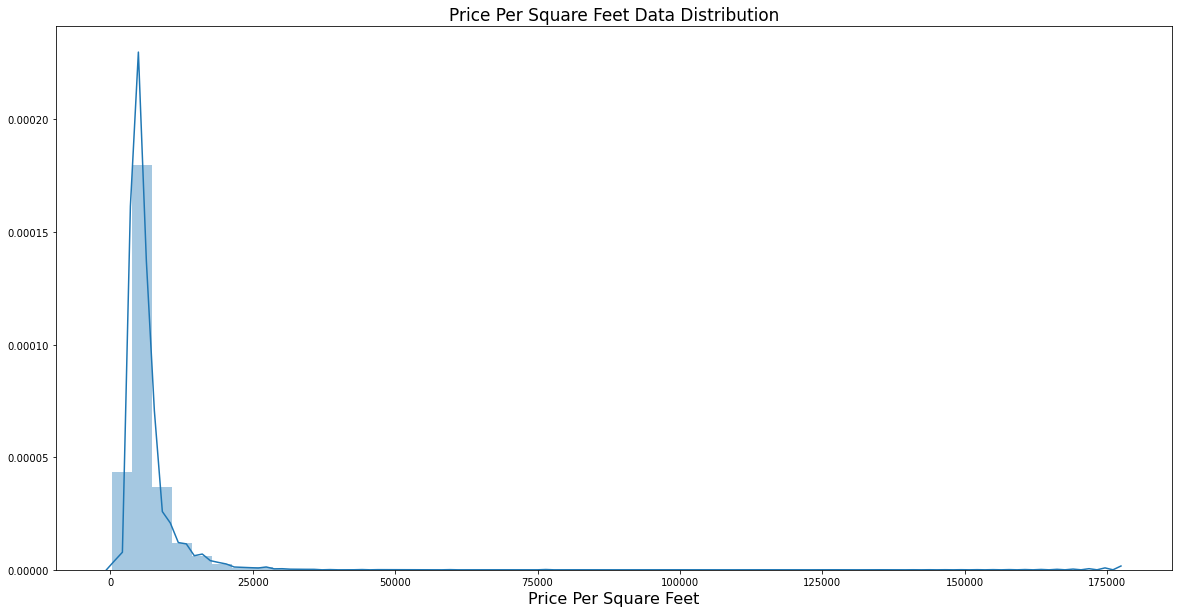

In [69]:
#plot to visualize Price Per Sq. Ft. data distribution
ax=sb.distplot(df4['price_per_sqft'])
ax.set_xlabel('Price Per Square Feet',fontdict={'fontsize':16})
ax.set_title('Price Per Square Feet Data Distribution',fontdict={'fontsize':17})

# Cap Outliers with K-Sigma Technique

In [70]:
#custom function to cap outliers

def cap_outliers(df):
    df_out = pd.DataFrame() #empty data frame
    for key,sub_df in df.groupby('location'):
        mu=np.mean(sub_df.price_per_sqft)
        sigma=np.std(sub_df.price_per_sqft)
        reduced_df=sub_df[(sub_df.price_per_sqft>(mu-sigma)) & (sub_df.price_per_sqft<(mu+sigma))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=False)
    return df_out

In [71]:
df5=cap_outliers(df4)

In [72]:
df5.shape

(10240, 6)

In [73]:
df5.price_per_sqft.describe()

count    10240.000000
mean      5680.538733
std       2319.691529
min       1250.000000
25%       4250.000000
50%       5178.142200
75%       6438.174665
max      24509.803922
Name: price_per_sqft, dtype: float64

Text(0.5, 1.0, 'Price Per Square Feet Data Distribution')

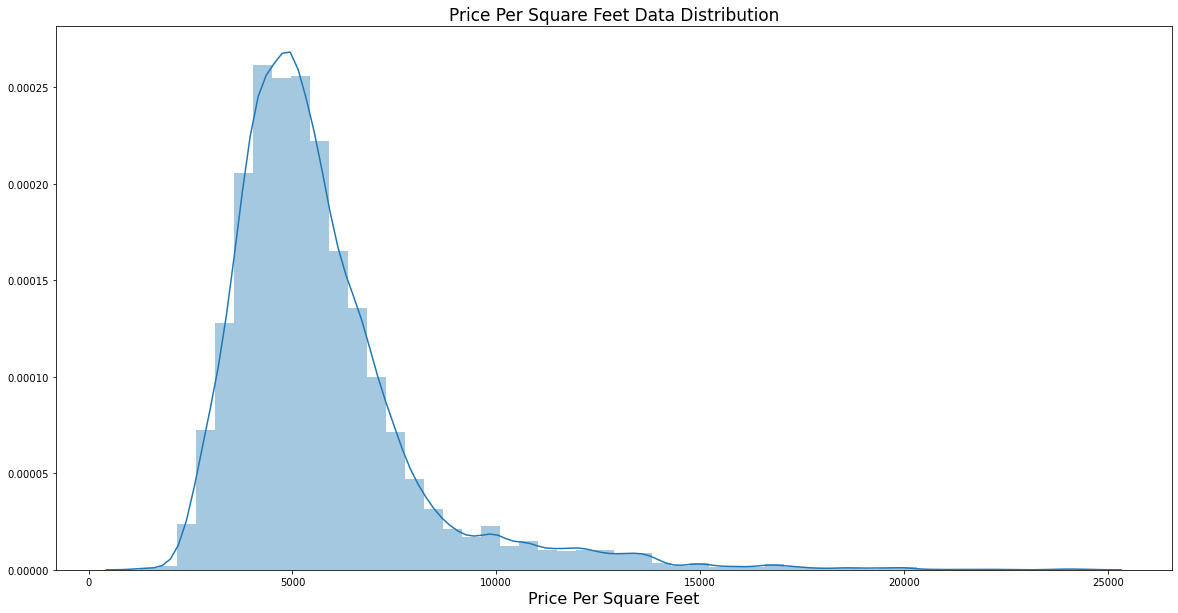

In [74]:
ax=sb.distplot(df5['price_per_sqft'])
ax.set_xlabel('Price Per Square Feet',fontdict={'fontsize':16})
ax.set_title('Price Per Square Feet Data Distribution',fontdict={'fontsize':17})

In [76]:
df5.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
210,1st block jayanagar,2850.0,4.0,428.0,4,15017.543860
848,1st block jayanagar,1630.0,3.0,194.0,3,11901.840491
2152,1st block jayanagar,1875.0,2.0,235.0,3,12533.333333
7138,1st block jayanagar,1200.0,2.0,130.0,3,10833.333333
7358,1st block jayanagar,1235.0,2.0,148.0,2,11983.805668


# Outliers Detection - 3

In [77]:
df5.bath.unique()

array([ 4.,  3.,  2.,  5.,  1.,  8.,  9.,  6., 14.,  7., 12., 16., 13.])

In [79]:
df5[df5.bath>10]

,location,total_sqft,bath,price,BHK,price_per_sqft
1078,btm 1st stage,3300.0,14.0,500.0,9,15151.515152
8636,neeladri nagar,4000.0,12.0,160.0,10,4000.000000
3096,other,12000.0,12.0,525.0,10,4375.000000
3609,other,10000.0,16.0,550.0,16,5500.000000
7979,other,6000.0,12.0,150.0,11,2500.000000
9935,other,5425.0,13.0,275.0,13,5069.124424


# It is unusual to have 2 more bathrooms than number of bedrooms in a home
if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [80]:
#check the total length of such bathrooms
len(df5[df5.bath>df5.BHK+1])

93

In [81]:
df5.shape

(10240, 6)

In [83]:
# Drop such bathrooms and extract the remaining data

df6=df5[df5.bath<=df5.BHK+1]

In [84]:
df6.shape

(10147, 6)

In [85]:
df6.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
210,1st block jayanagar,2850.0,4.0,428.0,4,15017.543860
848,1st block jayanagar,1630.0,3.0,194.0,3,11901.840491
2152,1st block jayanagar,1875.0,2.0,235.0,3,12533.333333
7138,1st block jayanagar,1200.0,2.0,130.0,3,10833.333333
7358,1st block jayanagar,1235.0,2.0,148.0,2,11983.805668


In [86]:
df6.shape

(10147, 6)

In [87]:

def scatter_plot(df,location,b1,b2):
    bhk2 = df[(df.location==location.lower()) & (df.BHK==b1)]
    bhk3 = df[(df.location==location.lower()) & (df.BHK==b2)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label=str(b1)+'BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label=str(b2)+'BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

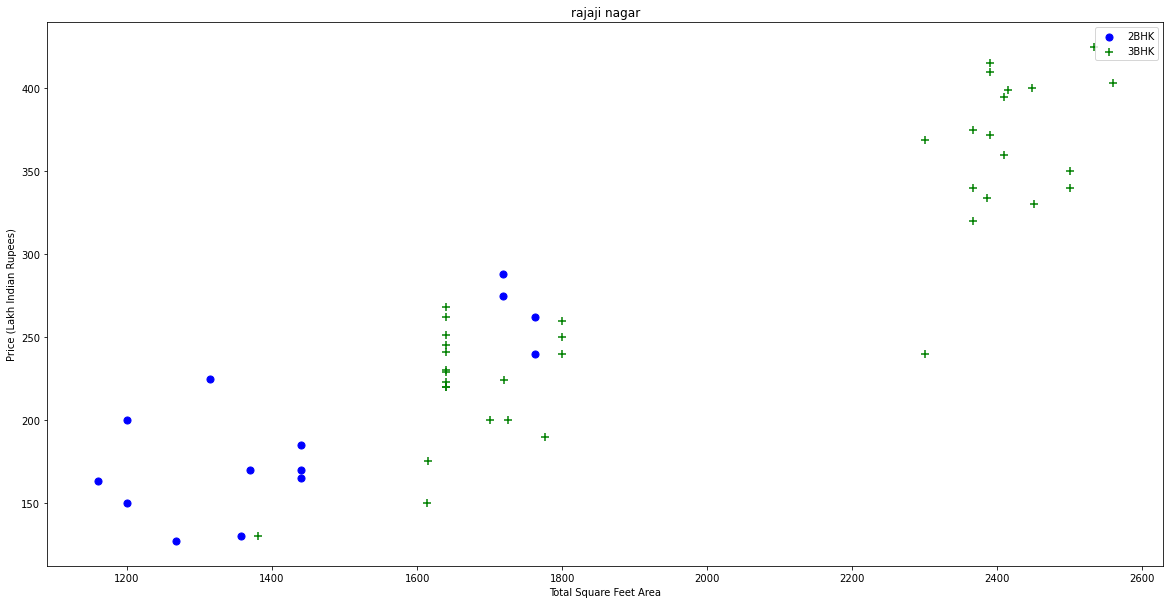

In [88]:
scatter_plot(df6,'rajaji nagar',2,3)

In [89]:
#custom function to remove such outliers

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis=0)

In [90]:
df7 = remove_bhk_outliers(df6)

In [91]:
df7.shape

(7375, 6)

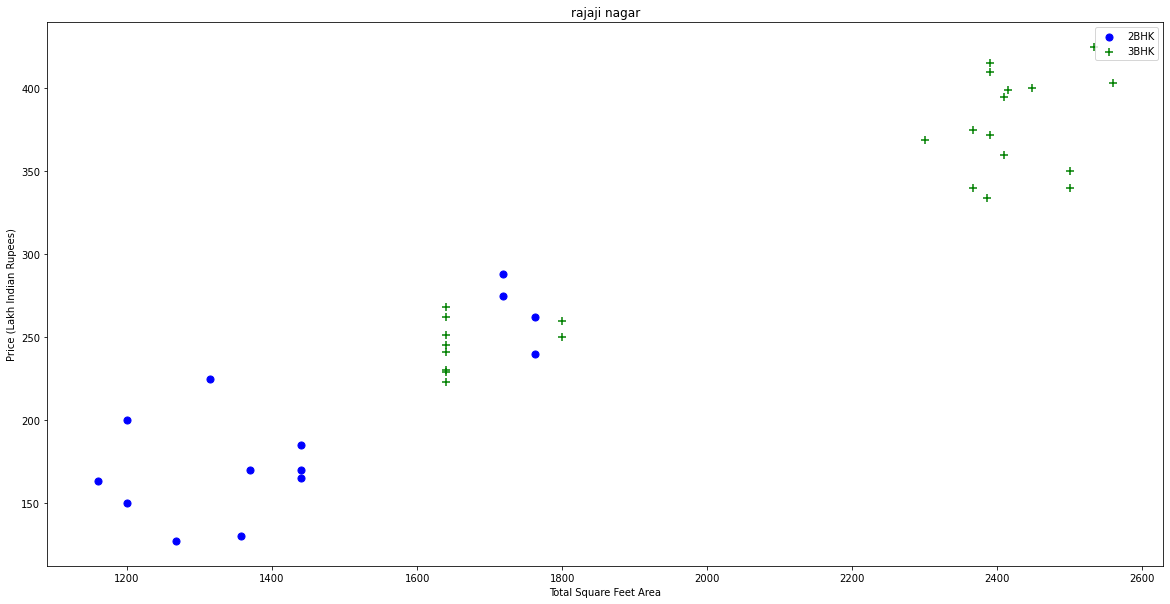

In [92]:
scatter_plot(df7,'rajaji nagar',2,3)

# STEP - 4: Dummy Encoding

In [93]:
location_df=pd.get_dummies(df7['location'])
location_df.head()

,1st block jayanagar,1st block koramangala,1st phase jp nagar,2nd phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,4th block koramangala,5th block hbr layout,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,9th phase jp nagar,abbigere,aecs layout,akshaya nagar,ambalipura,ambedkar nagar,amruthahalli,anandapura,ananth nagar,anekal,anjanapura,ardendale,arekere,attibele,b narayanapura,babusapalaya,badavala nagar,balagere,banagiri nagar,banashankari,banashankari stage ii,banashankari stage iii,banashankari stage v,banashankari stage vi,banaswadi,banjara layout,bannerghatta,bannerghatta road,basapura,basavangudi,basaveshwara nagar,battarahalli,begur,begur road,bellandur,beml layout,benson town,bharathi nagar,bhoganhalli,billekahalli,binny pete,bisuvanahalli,bommanahalli,bommasandra,bommasandra industrial area,bommenahalli,brookefield,btm 1st stage,btm 2nd stage,btm layout,budigere,chamrajpet,chandapura,chandra layout,channasandra,chennammana kere,chikka tirupathi,chikkabanavar,chikkalasandra,choodasandra,cooke town,cox town,cunningham road,cv raman nagar,dairy circle,dasanapura,dasarahalli,devanahalli,devarachikkanahalli,dodda nekkundi,doddaballapur,doddakallasandra,doddathoguru,dodsworth layout,domlur,dommasandra,ejipura,electronic city,electronic city phase ii,electronics city phase 1,epip zone,frazer town,ganga nagar,garudachar palya,giri nagar,gm palaya,gollahalli,gollarapalya hosahalli,gottigere,green glen layout,gubbalala,gunjur,gunjur palya,hal 2nd stage,haralur road,harlur,hbr layout,hebbal,hebbal kempapura,hegde nagar,hennur,hennur road,hoodi,horamavu agara,horamavu banaswadi,hormavu,hosa road,hosakerehalli,hoskote,hosur road,hrbr layout,hsr layout,hulimavu,iblur village,indira nagar,isro layout,itpl,ittamadu,jakkur,jakkur plantation,jalahalli,jalahalli east,jigani,jp nagar,judicial layout,kadubeesanahalli,kadugodi,kaggadasapura,kaggalipura,kaikondrahalli,kalena agrahara,kalkere,kalyan nagar,kamakshipalya,kambipura,kammanahalli,kammasandra,kanakapura,kanakpura road,kannamangala,karuna nagar,kasavanhalli,kasturi nagar,kathriguppe,kaval byrasandra,kaverappa layout,kenchenahalli,kengeri,kengeri satellite town,kereguddadahalli,kodichikkanahalli,kodigehaali,kodigehalli,kodihalli,kogilu,konanakunte,koramangala,kothannur,kothanur,kr puram,kudlu,kudlu gate,kudlu main road,kumaraswami layout,kundalahalli,laggere,lakshminarayana pura,lb shastri nagar,lingadheeranahalli,lingarajapuram,magadi road,mahadevpura,mahalakshmi layout,mallasandra,malleshpalya,malleshwaram,marathahalli,margondanahalli,marsur,mathikere,medahalli,mico layout,munnekollal,murugeshpalya,mysore road,nagadevanahalli,naganathapura,nagappa reddy layout,nagarbhavi,nagasandra,nagavara,nagavarapalya,narayanapura,neeladri nagar,nehru nagar,ngr layout,nri layout,old airport road,old madras road,ombr layout,other,padmanabhanagar,pai layout,panathur,parappana agrahara,pattandur agrahara,peenya,poorna pragna layout,prithvi layout,r.t. nagar,rachenahalli,raja rajeshwari nagar,rajaji nagar,rajiv nagar,ramagondanahalli,ramamurthy nagar,rayasandra,richmond town,sadashiva nagar,sahakara nagar,sanjay nagar,sarakki nagar,sarjapur,sarjapur road,sarjapura - attibele road,sector 1 hsr layout,sector 2 hsr layout,sector 7 hsr layout,seegehalli,shampura,shivaji nagar,singasandra,somasundara palya,sompura,sonnenahalli,subramanyapura,sultan palaya,talaghattapura,tc palaya,thanisandra,thigalarapalya,thubarahalli,thyagaraja nagar,tindlu,tumkur road,ulsoor,uttarahalli,varthur,varthur road,vasanthapura,vidyaranyapura,vignana nagar,vijayanagar,vishveshwarya layout,vishwanatha nagenahalli,vishwapriya layout,vittasandra,volagerekallahalli,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yemlur,yeshwanthpur
210,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [94]:
df8=pd.concat([df7,location_df.drop('other',axis=1),],axis=1)

In [95]:
df8.head()

,location,total_sqft,bath,price,BHK,price_per_sqft,1st block jayanagar,1st block koramangala,1st phase jp nagar,2nd phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,4th block koramangala,5th block hbr layout,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,9th phase jp nagar,abbigere,aecs layout,akshaya nagar,ambalipura,ambedkar nagar,amruthahalli,anandapura,ananth nagar,anekal,anjanapura,ardendale,arekere,attibele,b narayanapura,babusapalaya,badavala nagar,balagere,banagiri nagar,banashankari,banashankari stage ii,banashankari stage iii,banashankari stage v,banashankari stage vi,banaswadi,banjara layout,bannerghatta,bannerghatta road,basapura,basavangudi,basaveshwara nagar,battarahalli,begur,begur road,bellandur,beml layout,benson town,bharathi nagar,bhoganhalli,billekahalli,binny pete,bisuvanahalli,bommanahalli,bommasandra,bommasandra industrial area,bommenahalli,brookefield,btm 1st stage,btm 2nd stage,btm layout,budigere,chamrajpet,chandapura,chandra layout,channasandra,chennammana kere,chikka tirupathi,chikkabanavar,chikkalasandra,choodasandra,cooke town,cox town,cunningham road,cv raman nagar,dairy circle,dasanapura,dasarahalli,devanahalli,devarachikkanahalli,dodda nekkundi,doddaballapur,doddakallasandra,doddathoguru,dodsworth layout,domlur,dommasandra,ejipura,electronic city,electronic city phase ii,electronics city phase 1,epip zone,frazer town,ganga nagar,garudachar palya,giri nagar,gm palaya,gollahalli,gollarapalya hosahalli,gottigere,green glen layout,gubbalala,gunjur,gunjur palya,hal 2nd stage,haralur road,harlur,hbr layout,hebbal,hebbal kempapura,hegde nagar,hennur,hennur road,hoodi,horamavu agara,horamavu banaswadi,hormavu,hosa road,hosakerehalli,hoskote,hosur road,hrbr layout,hsr layout,hulimavu,iblur village,indira nagar,isro layout,itpl,ittamadu,jakkur,jakkur plantation,jalahalli,jalahalli east,jigani,jp nagar,judicial layout,kadubeesanahalli,kadugodi,kaggadasapura,kaggalipura,kaikondrahalli,kalena agrahara,kalkere,kalyan nagar,kamakshipalya,kambipura,kammanahalli,kammasandra,kanakapura,kanakpura road,kannamangala,karuna nagar,kasavanhalli,kasturi nagar,kathriguppe,kaval byrasandra,kaverappa layout,kenchenahalli,kengeri,kengeri satellite town,kereguddadahalli,kodichikkanahalli,kodigehaali,kodigehalli,kodihalli,kogilu,konanakunte,koramangala,kothannur,kothanur,kr puram,kudlu,kudlu gate,kudlu main road,kumaraswami layout,kundalahalli,laggere,lakshminarayana pura,lb shastri nagar,lingadheeranahalli,lingarajapuram,magadi road,mahadevpura,mahalakshmi layout,mallasandra,malleshpalya,malleshwaram,marathahalli,margondanahalli,marsur,mathikere,medahalli,mico layout,munnekollal,murugeshpalya,mysore road,nagadevanahalli,naganathapura,nagappa reddy layout,nagarbhavi,nagasandra,nagavara,nagavarapalya,narayanapura,neeladri nagar,nehru nagar,ngr layout,nri layout,old airport road,old madras road,ombr layout,padmanabhanagar,pai layout,panathur,parappana agrahara,pattandur agrahara,peenya,poorna pragna layout,prithvi layout,r.t. nagar,rachenahalli,raja rajeshwari nagar,rajaji nagar,rajiv nagar,ramagondanahalli,ramamurthy nagar,rayasandra,richmond town,sadashiva nagar,sahakara nagar,sanjay nagar,sarakki nagar,sarjapur,sarjapur road,sarjapura - attibele road,sector 1 hsr layout,sector 2 hsr layout,sector 7 hsr layout,seegehalli,shampura,shivaji nagar,singasandra,somasundara palya,sompura,sonnenahalli,subramanyapura,sultan palaya,talaghattapura,tc palaya,thanisandra,thigalarapalya,thubarahalli,thyagaraja nagar,tindlu,tumkur road,ulsoor,uttarahalli,varthur,varthur road,vasanthapura,vidyaranyapura,vignana nagar,vijayanagar,vishveshwarya layout,vishwanatha nagenahalli,vishwapriya layout,vittasandra,volagerekallahalli,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yemlur,yeshwanthpur
210,1st block jayanagar,2850.0,4.0,428.0,4,15017.543860,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [96]:
df8.drop(['location','price_per_sqft'],axis=1,inplace=True)

In [97]:
df8.shape


(7375, 280)

# STEP - 5: Train - Test Split

In [98]:
#Create X and y
y=df8.pop('price')
X = df8

In [99]:
y.head()

210     428.0
848     194.0
2152    235.0
7138    130.0
7358    148.0
Name: price, dtype: float64

In [100]:
X.head()

,total_sqft,bath,BHK,1st block jayanagar,1st block koramangala,1st phase jp nagar,2nd phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,4th block koramangala,5th block hbr layout,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,9th phase jp nagar,abbigere,aecs layout,akshaya nagar,ambalipura,ambedkar nagar,amruthahalli,anandapura,ananth nagar,anekal,anjanapura,ardendale,arekere,attibele,b narayanapura,babusapalaya,badavala nagar,balagere,banagiri nagar,banashankari,banashankari stage ii,banashankari stage iii,banashankari stage v,banashankari stage vi,banaswadi,banjara layout,bannerghatta,bannerghatta road,basapura,basavangudi,basaveshwara nagar,battarahalli,begur,begur road,bellandur,beml layout,benson town,bharathi nagar,bhoganhalli,billekahalli,binny pete,bisuvanahalli,bommanahalli,bommasandra,bommasandra industrial area,bommenahalli,brookefield,btm 1st stage,btm 2nd stage,btm layout,budigere,chamrajpet,chandapura,chandra layout,channasandra,chennammana kere,chikka tirupathi,chikkabanavar,chikkalasandra,choodasandra,cooke town,cox town,cunningham road,cv raman nagar,dairy circle,dasanapura,dasarahalli,devanahalli,devarachikkanahalli,dodda nekkundi,doddaballapur,doddakallasandra,doddathoguru,dodsworth layout,domlur,dommasandra,ejipura,electronic city,electronic city phase ii,electronics city phase 1,epip zone,frazer town,ganga nagar,garudachar palya,giri nagar,gm palaya,gollahalli,gollarapalya hosahalli,gottigere,green glen layout,gubbalala,gunjur,gunjur palya,hal 2nd stage,haralur road,harlur,hbr layout,hebbal,hebbal kempapura,hegde nagar,hennur,hennur road,hoodi,horamavu agara,horamavu banaswadi,hormavu,hosa road,hosakerehalli,hoskote,hosur road,hrbr layout,hsr layout,hulimavu,iblur village,indira nagar,isro layout,itpl,ittamadu,jakkur,jakkur plantation,jalahalli,jalahalli east,jigani,jp nagar,judicial layout,kadubeesanahalli,kadugodi,kaggadasapura,kaggalipura,kaikondrahalli,kalena agrahara,kalkere,kalyan nagar,kamakshipalya,kambipura,kammanahalli,kammasandra,kanakapura,kanakpura road,kannamangala,karuna nagar,kasavanhalli,kasturi nagar,kathriguppe,kaval byrasandra,kaverappa layout,kenchenahalli,kengeri,kengeri satellite town,kereguddadahalli,kodichikkanahalli,kodigehaali,kodigehalli,kodihalli,kogilu,konanakunte,koramangala,kothannur,kothanur,kr puram,kudlu,kudlu gate,kudlu main road,kumaraswami layout,kundalahalli,laggere,lakshminarayana pura,lb shastri nagar,lingadheeranahalli,lingarajapuram,magadi road,mahadevpura,mahalakshmi layout,mallasandra,malleshpalya,malleshwaram,marathahalli,margondanahalli,marsur,mathikere,medahalli,mico layout,munnekollal,murugeshpalya,mysore road,nagadevanahalli,naganathapura,nagappa reddy layout,nagarbhavi,nagasandra,nagavara,nagavarapalya,narayanapura,neeladri nagar,nehru nagar,ngr layout,nri layout,old airport road,old madras road,ombr layout,padmanabhanagar,pai layout,panathur,parappana agrahara,pattandur agrahara,peenya,poorna pragna layout,prithvi layout,r.t. nagar,rachenahalli,raja rajeshwari nagar,rajaji nagar,rajiv nagar,ramagondanahalli,ramamurthy nagar,rayasandra,richmond town,sadashiva nagar,sahakara nagar,sanjay nagar,sarakki nagar,sarjapur,sarjapur road,sarjapura - attibele road,sector 1 hsr layout,sector 2 hsr layout,sector 7 hsr layout,seegehalli,shampura,shivaji nagar,singasandra,somasundara palya,sompura,sonnenahalli,subramanyapura,sultan palaya,talaghattapura,tc palaya,thanisandra,thigalarapalya,thubarahalli,thyagaraja nagar,tindlu,tumkur road,ulsoor,uttarahalli,varthur,varthur road,vasanthapura,vidyaranyapura,vignana nagar,vijayanagar,vishveshwarya layout,vishwanatha nagenahalli,vishwapriya layout,vittasandra,volagerekallahalli,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yemlur,yeshwanthpur
210,2850.0,4.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [101]:
#reset index

X=X.reset_index()
X.drop(['index'],axis=1,inplace=True)

In [106]:
#split the data in train and test dataset
import sklearn
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,test_size=0.2,random_state=10)

# STEP - 6: Feature Scaling

In [107]:
#import necessary libraries
from sklearn.preprocessing import MinMaxScaler

In [108]:
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)

# STEP - 7: Model Building

In [110]:
#Build a linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [111]:
y_pred=model.predict(X_train)


In [113]:
# evaluate the model by using r2 score

sklearn.metrics.r2_score(y_train,y_pred)


0.8721980012127748

# STEP - 8: Residual Analysis

Text(0.5, 1.0, 'Residuals Analysis')

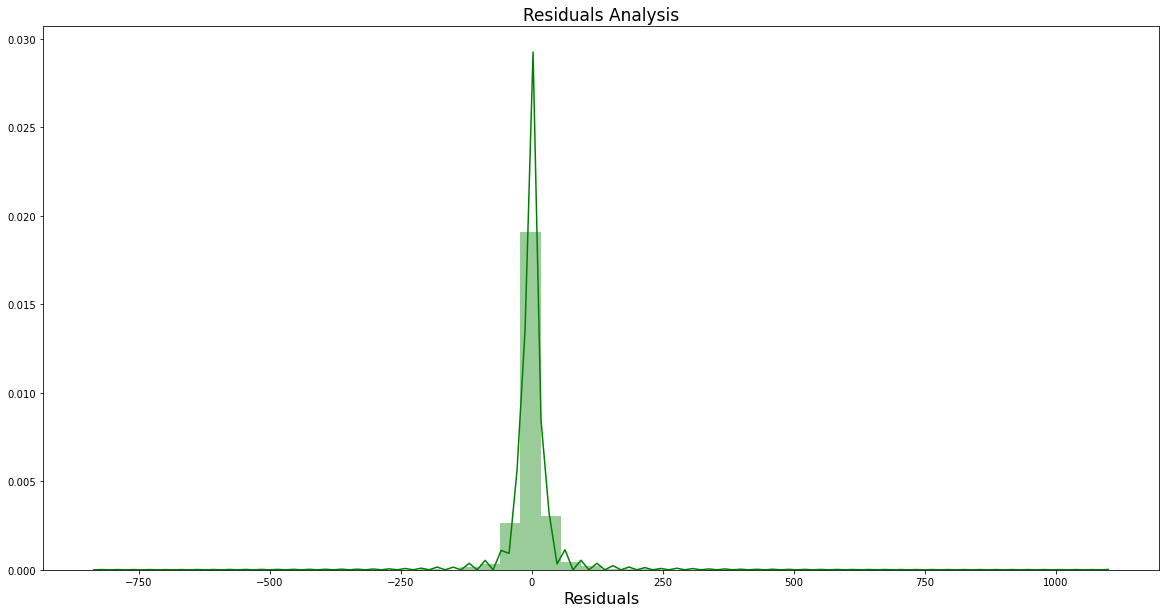

In [114]:
# Residual Analysis to prove Linear Regression Assumptions
res = y_train - y_pred
ax = sb.distplot(res,color='green')
ax.set_xlabel('Residuals',fontdict={'fontsize':16})
ax.set_title('Residuals Analysis',fontdict={'fontsize':17})


# STEP - 9: Test the model

In [115]:
X_test=scaler.transform(X_test)

In [116]:
y_pred_2=model.predict(X_test)

In [127]:
# Evaluate the test data

sklearn.metrics.r2_score(y_test,y_pred_2)

0.8625053671560745

Text(0.5, 1.0, 'Test Residuals Analysis')

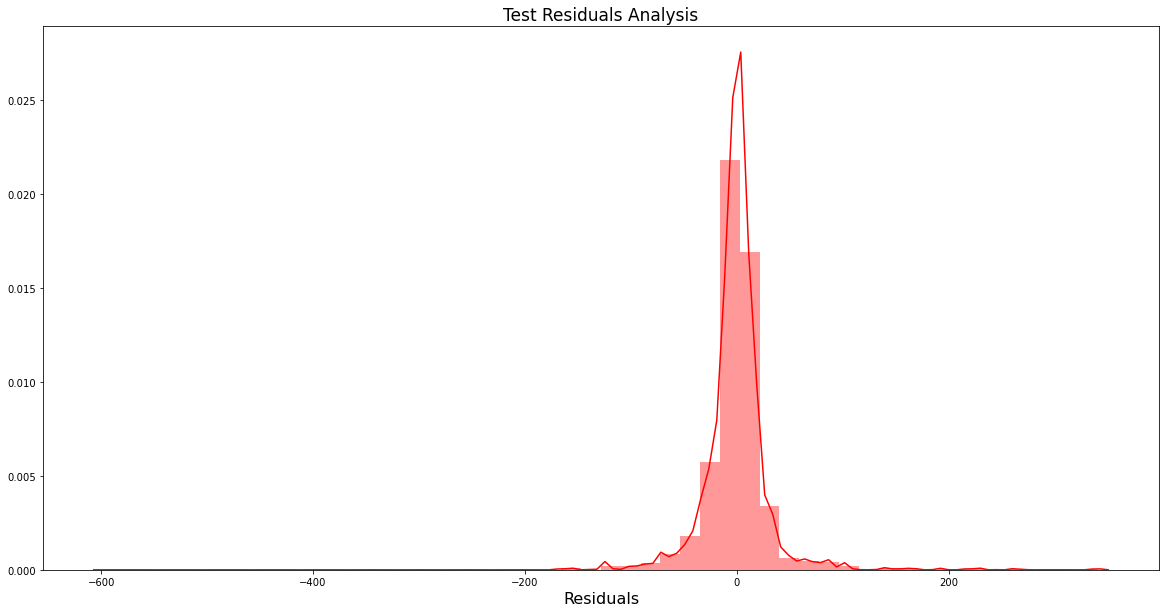

In [128]:
# Again residual Analysis
res2 = y_test - y_pred_2
ax = sb.distplot(res2,color='red')
ax.set_xlabel('Residuals',fontdict={'fontsize':16})
ax.set_title('Test Residuals Analysis',fontdict={'fontsize':17})

# Model Evaluation

Text(0, 0.5, 'y_pred')

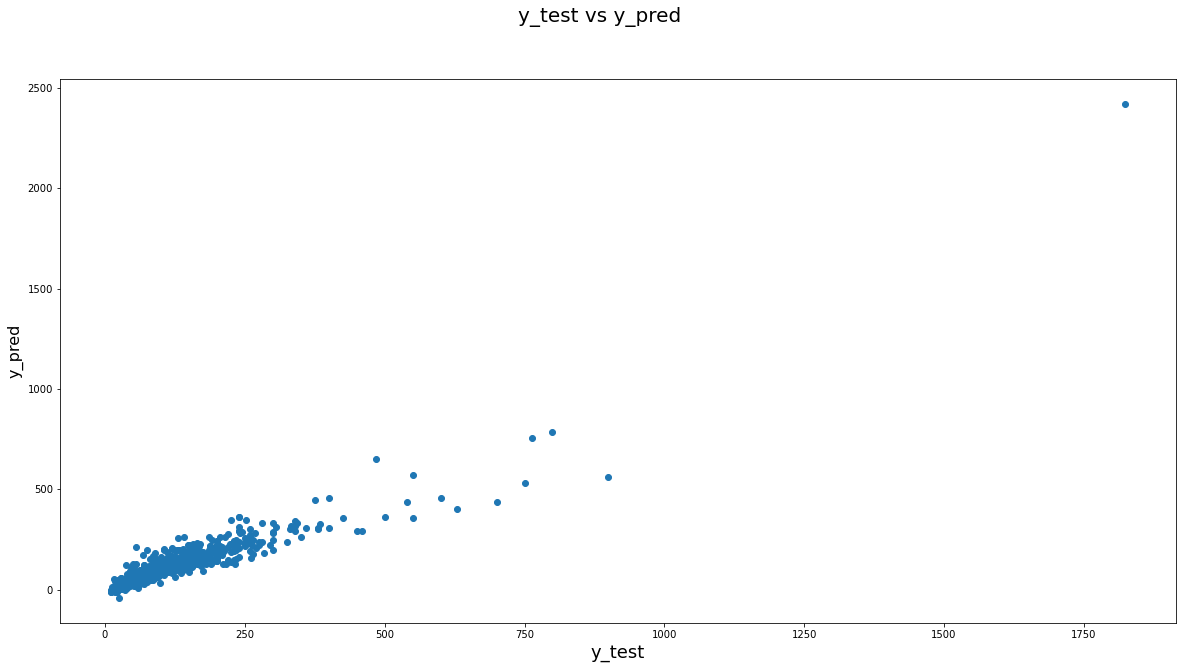

In [129]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_2)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

# Single Price Prediction

In [130]:
#custom function to predict the price

def predict_price(location,sqft,bath,bhk):    
    try:         
        location=location.lower()
        loc_index = np.where(X.columns==location)[0][0] #6
        x = np.zeros(len(X.columns))
        x[0] = sqft
        x[1] = bath
        x[2] = bhk
        if loc_index >= 0:
            x[loc_index] = 1
        x_trans=scaler.transform([x])
        return model.predict(x_trans)[0]
    except:
        return 'invalid location'

In [131]:
predict_price('1st phase jp nagar',1000,2,2)


85.59522967445314

In [132]:
predict_price('gdgkdjgkdjgkdgkjdhg',2000,3,3)

'invalid location'

# Import file into pickle

In [133]:
import pickle,json

In [134]:
# scaling data saved in pickle file on a disk

with open('bengaluru_house_price_prediction_scale.pickle',"wb") as f:
    pickle.dump(scaler,f)
    print("scaling file saved")

scaling file saved


In [125]:
# model saved in pickle file on a disk 

with open('bengaluru_house_price_prediction.pickle',"wb") as f:
    pickle.dump(model,f)
    print("model file saved")

model file saved


In [126]:
# creating json file 

columns = {   #this is json object
    'all_columns':[col for col in X.columns] #this is json array
}

with open('all_columns.json','w') as f:
    json.dump(columns,f)
